# Exploring the mouse atlas with scanpy

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_version_and_date()
# we will soon provide an update with more recent dependencies
sc.logging.print_versions_dependencies_numerics()

/Users/davidcook/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Running Scanpy 0.4.1 on 2018-01-11 12:00.
Dependencies: numpy==1.14.0 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


## Loading the data
Let's test scanpy and see how it runs on my laptop.

This comes from the first release from the [Tabula Muris consortium](https://www.biorxiv.org/content/early/2017/12/20/237446). The data set is ~60k cell spanning 12 tissues (paper is 20 tissues, but this is only the 10x Genomics samples they ran). The data comes as cellranger outputs (convenient for loading into scanpy), with each collection being a separate directory. There's probably an easier/faster way, but I'll just load each data into an AnnData and then concatenate them all.

Note: I originally misinterpreted the "P#" in the file names as the mouse age  (eg. Postnatal day 4/7/8), but the manuscript says that the mice are all adults (10-13 weeks if I recall)

In [2]:
#Bladder
path = 'droplet/Bladder-10X_P4_3/'
adata_bladder_p4_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_bladder_p4_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_bladder_p4_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_bladder_p4_1.obs['Tissue'] = 'Bladder'
adata_bladder_p4_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_bladder_p4_1, min_genes=250)

path = 'droplet/Bladder-10X_P4_4/'
adata_bladder_p4_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_bladder_p4_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_bladder_p4_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_bladder_p4_2.obs['Tissue'] = 'Bladder'
adata_bladder_p4_2.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_bladder_p4_2, min_genes=250)

path = 'droplet/Bladder-10X_P7_7/'
adata_bladder_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_bladder_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_bladder_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_bladder_p7_1.obs['Tissue'] = 'Bladder'
adata_bladder_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_bladder_p7_1, min_genes=250)

#Heart
path = 'droplet/Heart-10X_P7_4/'
adata_heart_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_heart_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_heart_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_heart_p7_1.obs['Tissue'] = 'Heart'
adata_heart_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_heart_p7_1, min_genes=250)

#Kidney
path = 'droplet/Kidney-10X_P4_5/'
adata_kidney_p4_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_kidney_p4_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_kidney_p4_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_kidney_p4_1.obs['Tissue'] = 'Kidney'
adata_kidney_p4_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_kidney_p4_1, min_genes=250)

path = 'droplet/Kidney-10X_P4_6/'
adata_kidney_p4_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_kidney_p4_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_kidney_p4_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_kidney_p4_2.obs['Tissue'] = 'Kidney'
adata_kidney_p4_2.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_kidney_p4_2, min_genes=250)

path = 'droplet/Kidney-10X_P7_5/'
adata_kidney_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_kidney_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_kidney_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_kidney_p7_1.obs['Tissue'] = 'Kidney'
adata_kidney_p7_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_kidney_p7_1, min_genes=250)

#Liver
path = 'droplet/Liver-10X_P4_2/'
adata_liver_p4_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_liver_p4_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_liver_p4_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_liver_p4_1.obs['Tissue'] = 'Liver'
adata_liver_p4_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_liver_p4_1, min_genes=250)

path = 'droplet/Liver-10X_P7_0/'
adata_liver_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_liver_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_liver_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_liver_p7_1.obs['Tissue'] = 'Liver'
adata_liver_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_liver_p7_1, min_genes=250)

path = 'droplet/Liver-10X_P7_1/'
adata_liver_p7_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_liver_p7_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_liver_p7_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_liver_p7_2.obs['Tissue'] = 'Liver'
adata_liver_p7_2.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_liver_p7_2, min_genes=250)


#Lung
path = 'droplet/Lung-10X_P7_8/'
adata_lung_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_lung_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_lung_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_lung_p7_1.obs['Tissue'] = 'Lung'
adata_lung_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_lung_p7_1, min_genes=250)

path = 'droplet/Lung-10X_P7_9/'
adata_lung_p7_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_lung_p7_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_lung_p7_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_lung_p7_2.obs['Tissue'] = 'Lung'
adata_lung_p7_2.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_lung_p7_2, min_genes=250)

path = 'droplet/Lung-10X_P8_12/'
adata_lung_p8_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_lung_p8_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_lung_p8_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_lung_p8_1.obs['Tissue'] = 'Lung'
adata_lung_p8_1.obs['Age'] = 'P8'
sc.pp.filter_cells(adata_lung_p8_1, min_genes=250)

path = 'droplet/Lung-10X_P8_13/'
adata_lung_p8_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_lung_p8_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_lung_p8_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_lung_p8_2.obs['Tissue'] = 'Lung'
adata_lung_p8_2.obs['Age'] = 'P8'
sc.pp.filter_cells(adata_lung_p8_2, min_genes=250)

#Mammary
path = 'droplet/Mammary-10X_P7_12/'
adata_mammary_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_mammary_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_mammary_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_mammary_p7_1.obs['Tissue'] = 'Mammary'
adata_mammary_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_mammary_p7_1, min_genes=250)

path = 'droplet/Mammary-10X_P7_13/'
adata_mammary_p7_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_mammary_p7_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_mammary_p7_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_mammary_p7_2.obs['Tissue'] = 'Mammary'
adata_mammary_p7_2.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_mammary_p7_2, min_genes=250)

#Marrow
path = 'droplet/Marrow-10X_P7_2/'
adata_marrow_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_marrow_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_marrow_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_marrow_p7_1.obs['Tissue'] = 'Marrow'
adata_marrow_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_marrow_p7_1, min_genes=250)

path = 'droplet/Marrow-10X_P7_3/'
adata_marrow_p7_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_marrow_p7_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_marrow_p7_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_marrow_p7_2.obs['Tissue'] = 'Marrow'
adata_marrow_p7_2.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_marrow_p7_2, min_genes=250)

#Muscle
path = 'droplet/Muscle-10X_P7_14/'
adata_muscle_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_muscle_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_muscle_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_muscle_p7_1.obs['Tissue'] = 'Muscle'
adata_muscle_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_muscle_p7_1, min_genes=250)

path = 'droplet/Muscle-10X_P7_15/'
adata_muscle_p7_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_muscle_p7_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_muscle_p7_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_muscle_p7_2.obs['Tissue'] = 'Muscle'
adata_muscle_p7_2.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_muscle_p7_2, min_genes=250)

#Spleen
path = 'droplet/Spleen-10X_P4_7/'
adata_spleen_p4_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_spleen_p4_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_spleen_p4_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_spleen_p4_1.obs['Tissue'] = 'Spleen'
adata_spleen_p4_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_spleen_p4_1, min_genes=250)

path = 'droplet/Spleen-10X_P7_6/'
adata_spleen_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_spleen_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_spleen_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_spleen_p7_1.obs['Tissue'] = 'Spleen'
adata_spleen_p7_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_spleen_p7_1, min_genes=250)

#Thymus
path = 'droplet/Thymus-10X_P7_11/'
adata_thymus_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_thymus_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_thymus_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_thymus_p7_1.obs['Tissue'] = 'Thymus'
adata_thymus_p7_1.obs['Age'] = 'P7'
sc.pp.filter_cells(adata_thymus_p7_1, min_genes=250)

#Tongue
path = 'droplet/Tongue-10X_P4_0/'
adata_Tongue_p4_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_Tongue_p4_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_Tongue_p4_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_Tongue_p4_1.obs['Tissue'] = 'Tongue'
adata_Tongue_p4_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_Tongue_p4_1, min_genes=250)

path = 'droplet/Tongue-10X_P4_1/'
adata_Tongue_p4_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_Tongue_p4_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_Tongue_p4_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_Tongue_p4_2.obs['Tissue'] = 'Tongue'
adata_Tongue_p4_2.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_Tongue_p4_2, min_genes=250)

path = 'droplet/Tongue-10X_P7_10/'
adata_Tongue_p7_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_Tongue_p7_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_Tongue_p7_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_Tongue_p7_1.obs['Tissue'] = 'Tongue'
adata_Tongue_p7_1.obs['Age'] = 'P4'
sc.pp.filter_cells(adata_Tongue_p7_1, min_genes=250)

#Trachea
path = 'droplet/Trachea-10X_P8_14/'
adata_Trachea_p8_1 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_Trachea_p8_1.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_Trachea_p8_1.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_Trachea_p8_1.obs['Tissue'] = 'Trachea'
adata_Trachea_p8_1.obs['Age'] = 'P8'
sc.pp.filter_cells(adata_Trachea_p8_1, min_genes=250)

path = 'droplet/Trachea-10X_P8_15/'
adata_Trachea_p8_2 = sc.read(path + 'matrix.mtx', cache=True).transpose()
adata_Trachea_p8_2.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
adata_Trachea_p8_2.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
adata_Trachea_p8_2.obs['Tissue'] = 'Trachea'
adata_Trachea_p8_2.obs['Age'] = 'P8'
sc.pp.filter_cells(adata_Trachea_p8_2, min_genes=250)

... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time
... writing an

In [4]:
adata = adata_bladder_p4_1.concatenate([adata_bladder_p4_2,
                                       adata_bladder_p7_1,
                                       adata_heart_p7_1,
                                       adata_kidney_p4_1,
                                       adata_kidney_p4_2,
                                       adata_kidney_p7_1,
                                       adata_liver_p4_1,
                                       adata_liver_p7_1,
                                       adata_liver_p7_2,
                                       adata_lung_p7_1,
                                       adata_lung_p7_2,
                                       adata_lung_p8_1,
                                       adata_lung_p8_2,
                                       adata_mammary_p7_1,
                                       adata_mammary_p7_2,
                                       adata_marrow_p7_1,
                                       adata_marrow_p7_2,
                                       adata_muscle_p7_1,
                                       adata_muscle_p7_2,
                                       adata_spleen_p4_1,
                                       adata_spleen_p7_1,
                                       adata_thymus_p7_1,
                                       adata_Tongue_p4_1,
                                       adata_Tongue_p4_2,
                                       adata_Tongue_p7_1,
                                       adata_Trachea_p8_1,
                                       adata_Trachea_p8_2])

In [5]:
adata

AnnData object with n_obs × n_vars = 58510 × 23433 
    obs_keys = ['Tissue', 'Age', 'n_genes', 'batch']

In [6]:
adata.write('./write/mouse.atlas.h5ad')

# Preprocessing

In [7]:
sc.pp.filter_genes(adata, min_cells=5)
sc.pp.filter_cells(adata, min_genes=250) 

In [8]:
mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
# for each cell compute fraction of counts in mito genes vs. all genes
# the ".A1" is only necessary, as X is sparse - it transform to a dense array after summing
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = np.sum(adata.X, axis=1).A1

... storing Tissue as categorical type
--> access categories as adata.obs['Tissue'].cat.categories
... storing Age as categorical type
--> access categories as adata.obs['Age'].cat.categories


/Users/davidcook/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


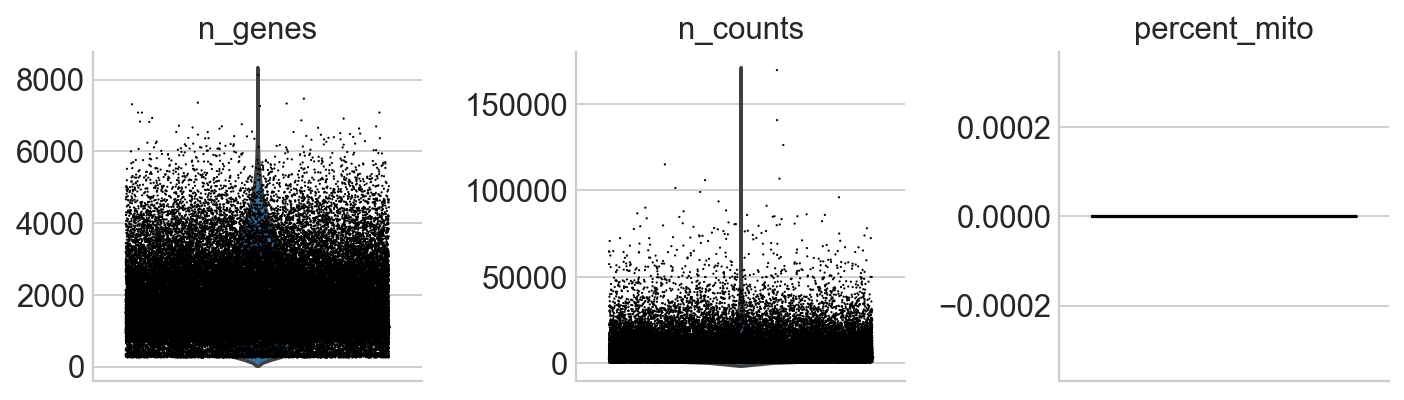

In [9]:
axs = sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
                   jitter=0.4, multi_panel=True)

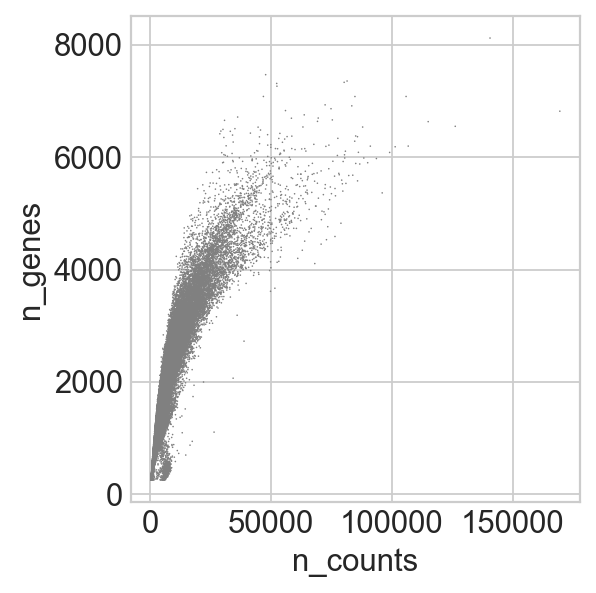

In [11]:
ax = sc.pl.scatter(adata, x='n_counts', y='n_genes')

normalizing by total count per cell
    finished (0:00:02.951): normalized adata.X and added
    'n_counts', counts per cell before normalization (adata.obs)
filter highly variable genes by dispersion and mean (0:00:05.405)
--> set `n_top_genes` to simply select top-scoring genes instead


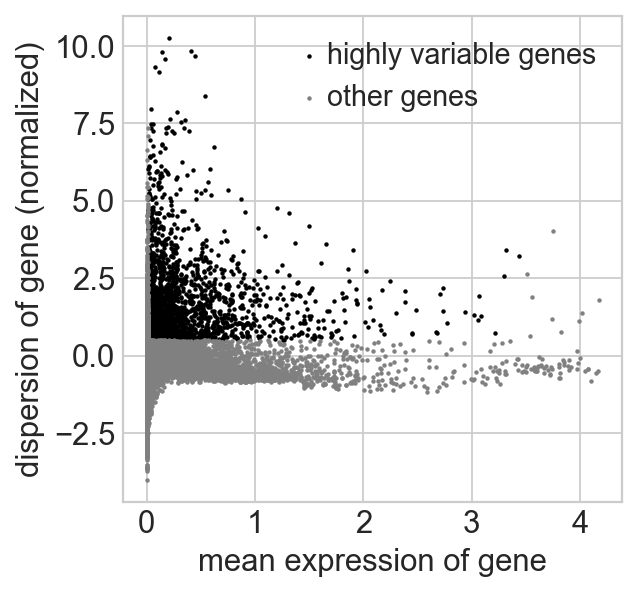

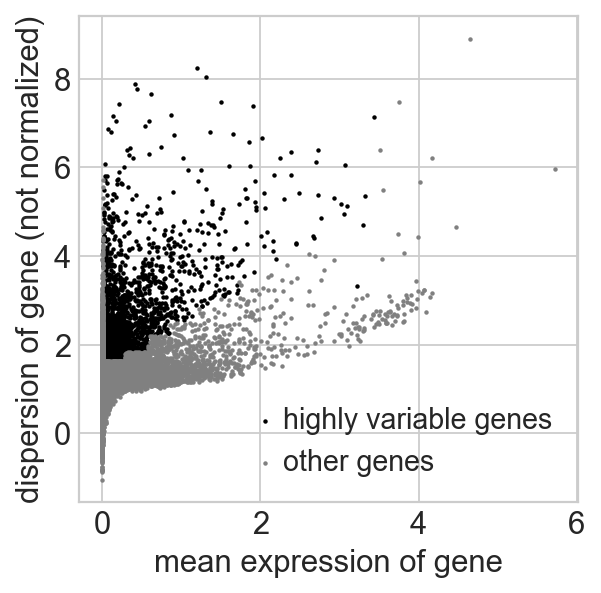

In [12]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) #simple lib size normalization?
filter_result = sc.pp.filter_genes_dispersion(
    adata.X, min_mean=0.0125, max_mean=3.5, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [13]:
adata = adata[:, filter_result.gene_subset]

In [14]:
sc.pp.log1p(adata)

In [15]:
sc.pp.regress_out(adata, ['n_counts'])

/Users/davidcook/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


A Jupyter Widget


--> after `sc.pp.regress_out`, consider rescaling the adata using `sc.pp.scale`


In [16]:
sc.pp.scale(adata, max_value=10)

# Exploration

## PCA
As expected, visualization using PCA for this dataset is pretty uninterpretable because of the complexity

In [17]:
sc.tl.pca(adata)

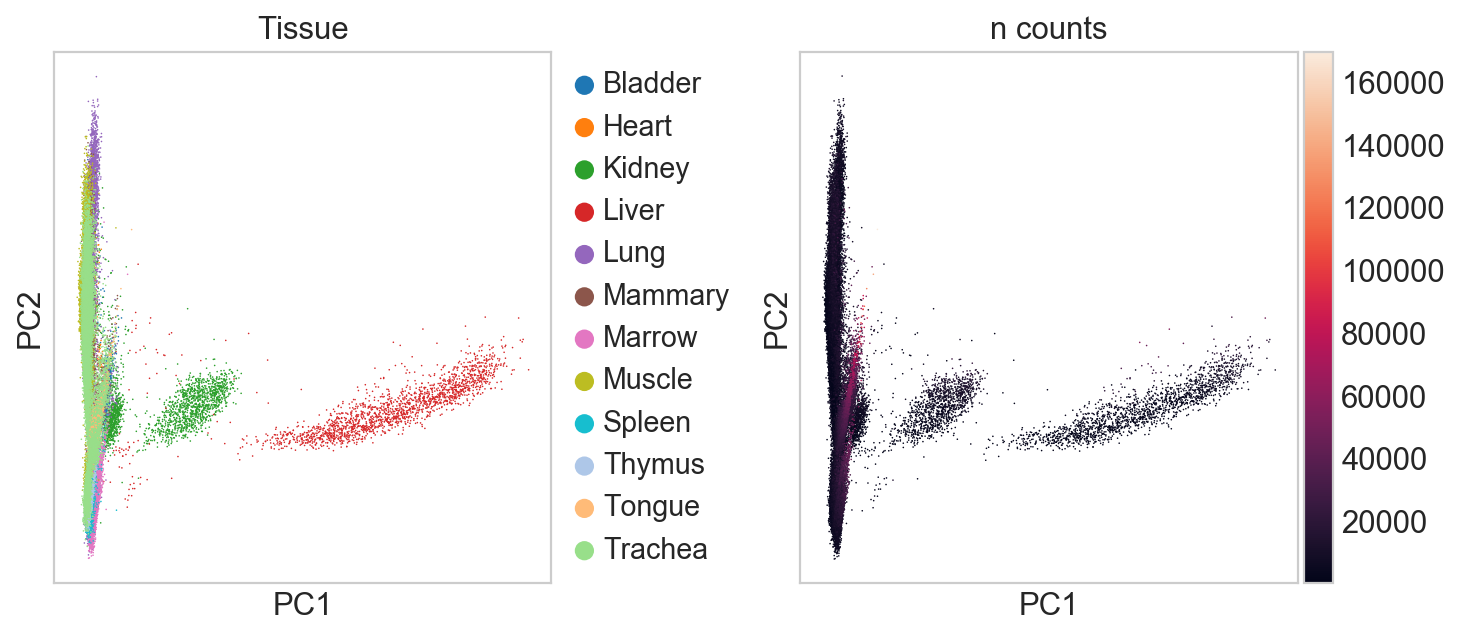

In [21]:
ax = sc.pl.pca_scatter(adata, color=['Tissue', 'n_counts'], right_margin=0.5)

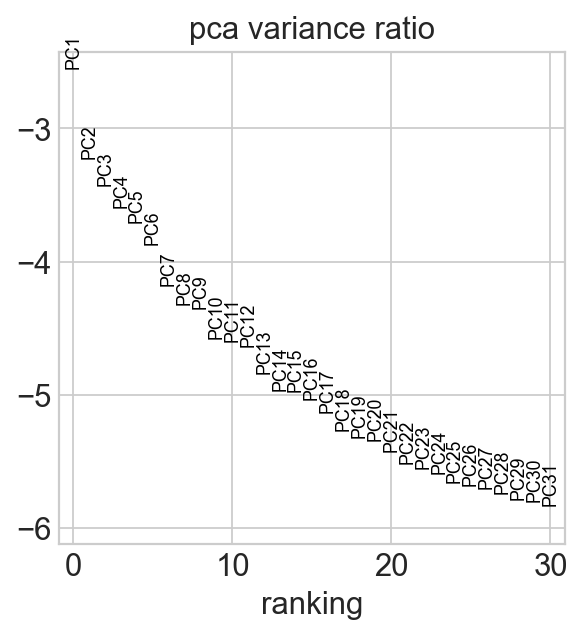

In [19]:
sc.pl.pca_variance_ratio(adata, log=True)

## Louvain clustering

In [38]:
sc.tl.louvain(adata)

running Louvain clustering
    using 'X_pca' with n_pcs = 50 for building graph
    using stored data graph with n_neighbors = 30 and spectrum
    [1.         0.9996776  0.9995776  0.9993246  0.9992813  0.99896175
     0.998886   0.99846095 0.99807554 0.9979416  0.99781233 0.9977179
     0.9971189  0.9965163  0.9965084 ]
    using the "louvain" package of Traag (2017)
    finished (0:00:41.407) --> found 49 clusters and added
    'louvain_groups', the cluster labels (adata.obs, dtype=category)


## tSNE
I toyed around with a few perplexity values. 30-100 gave pretty similar results

In [40]:
sc.tl.tsne(adata, perplexity=50)

computing tSNE
    using 'X_pca' with n_pcs = 50 for tSNE
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:18:45.830) --> added
    'X_tsne', tSNE coordinates (adata.obs)


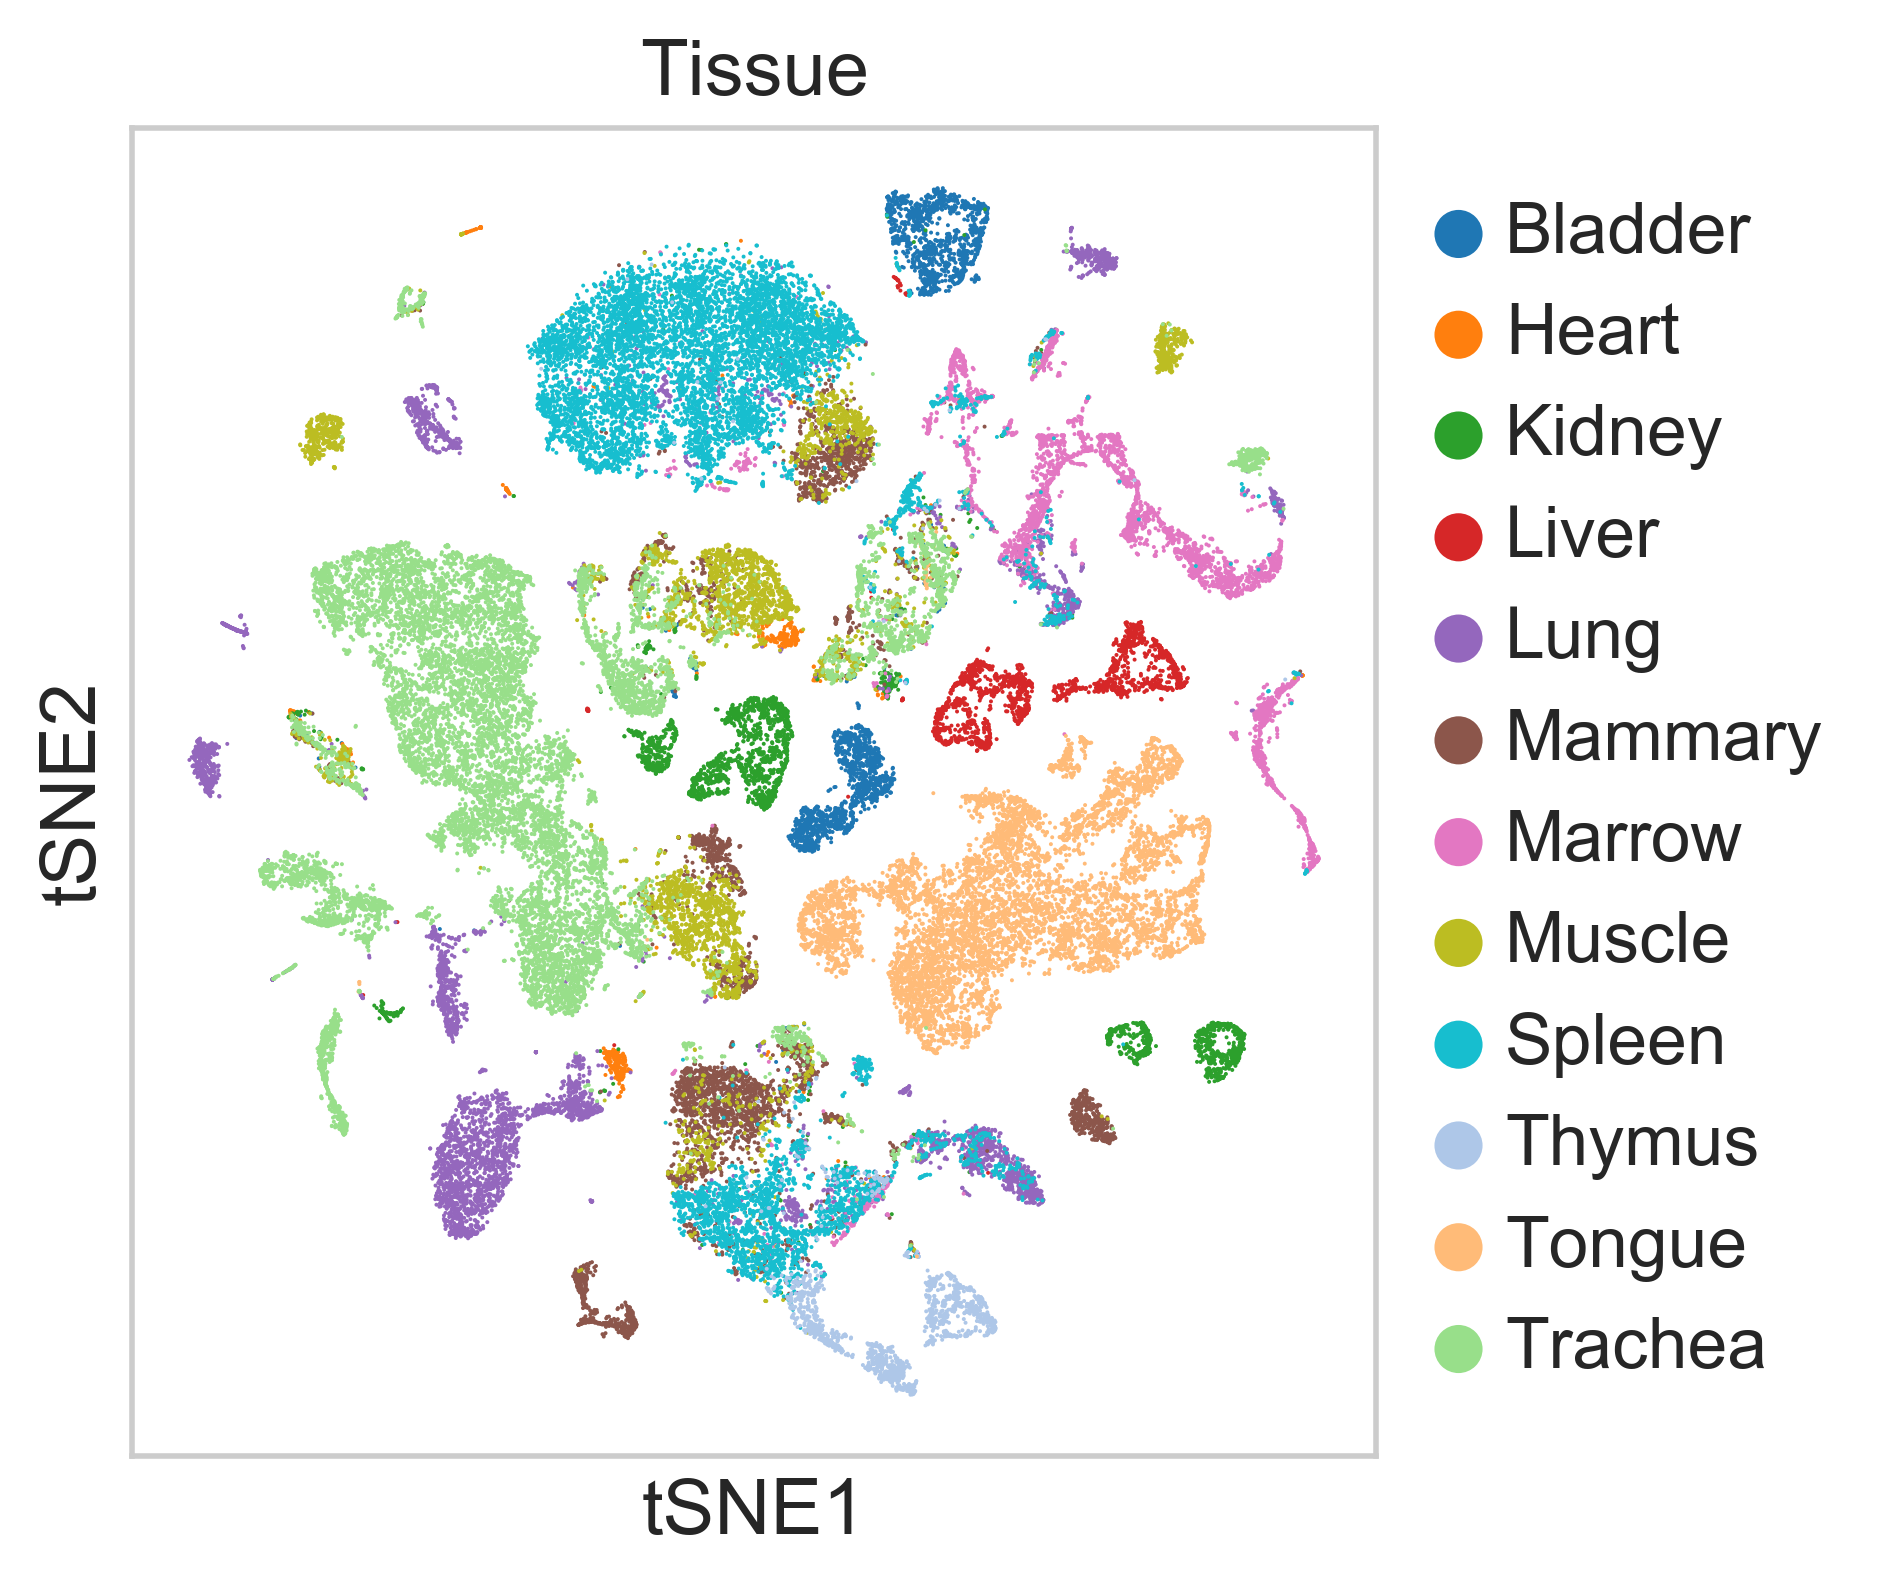

In [41]:
sc.settings.set_figure_params(dpi=200)
sc.pl.tsne(adata, color=['Tissue'], right_margin=0.5)

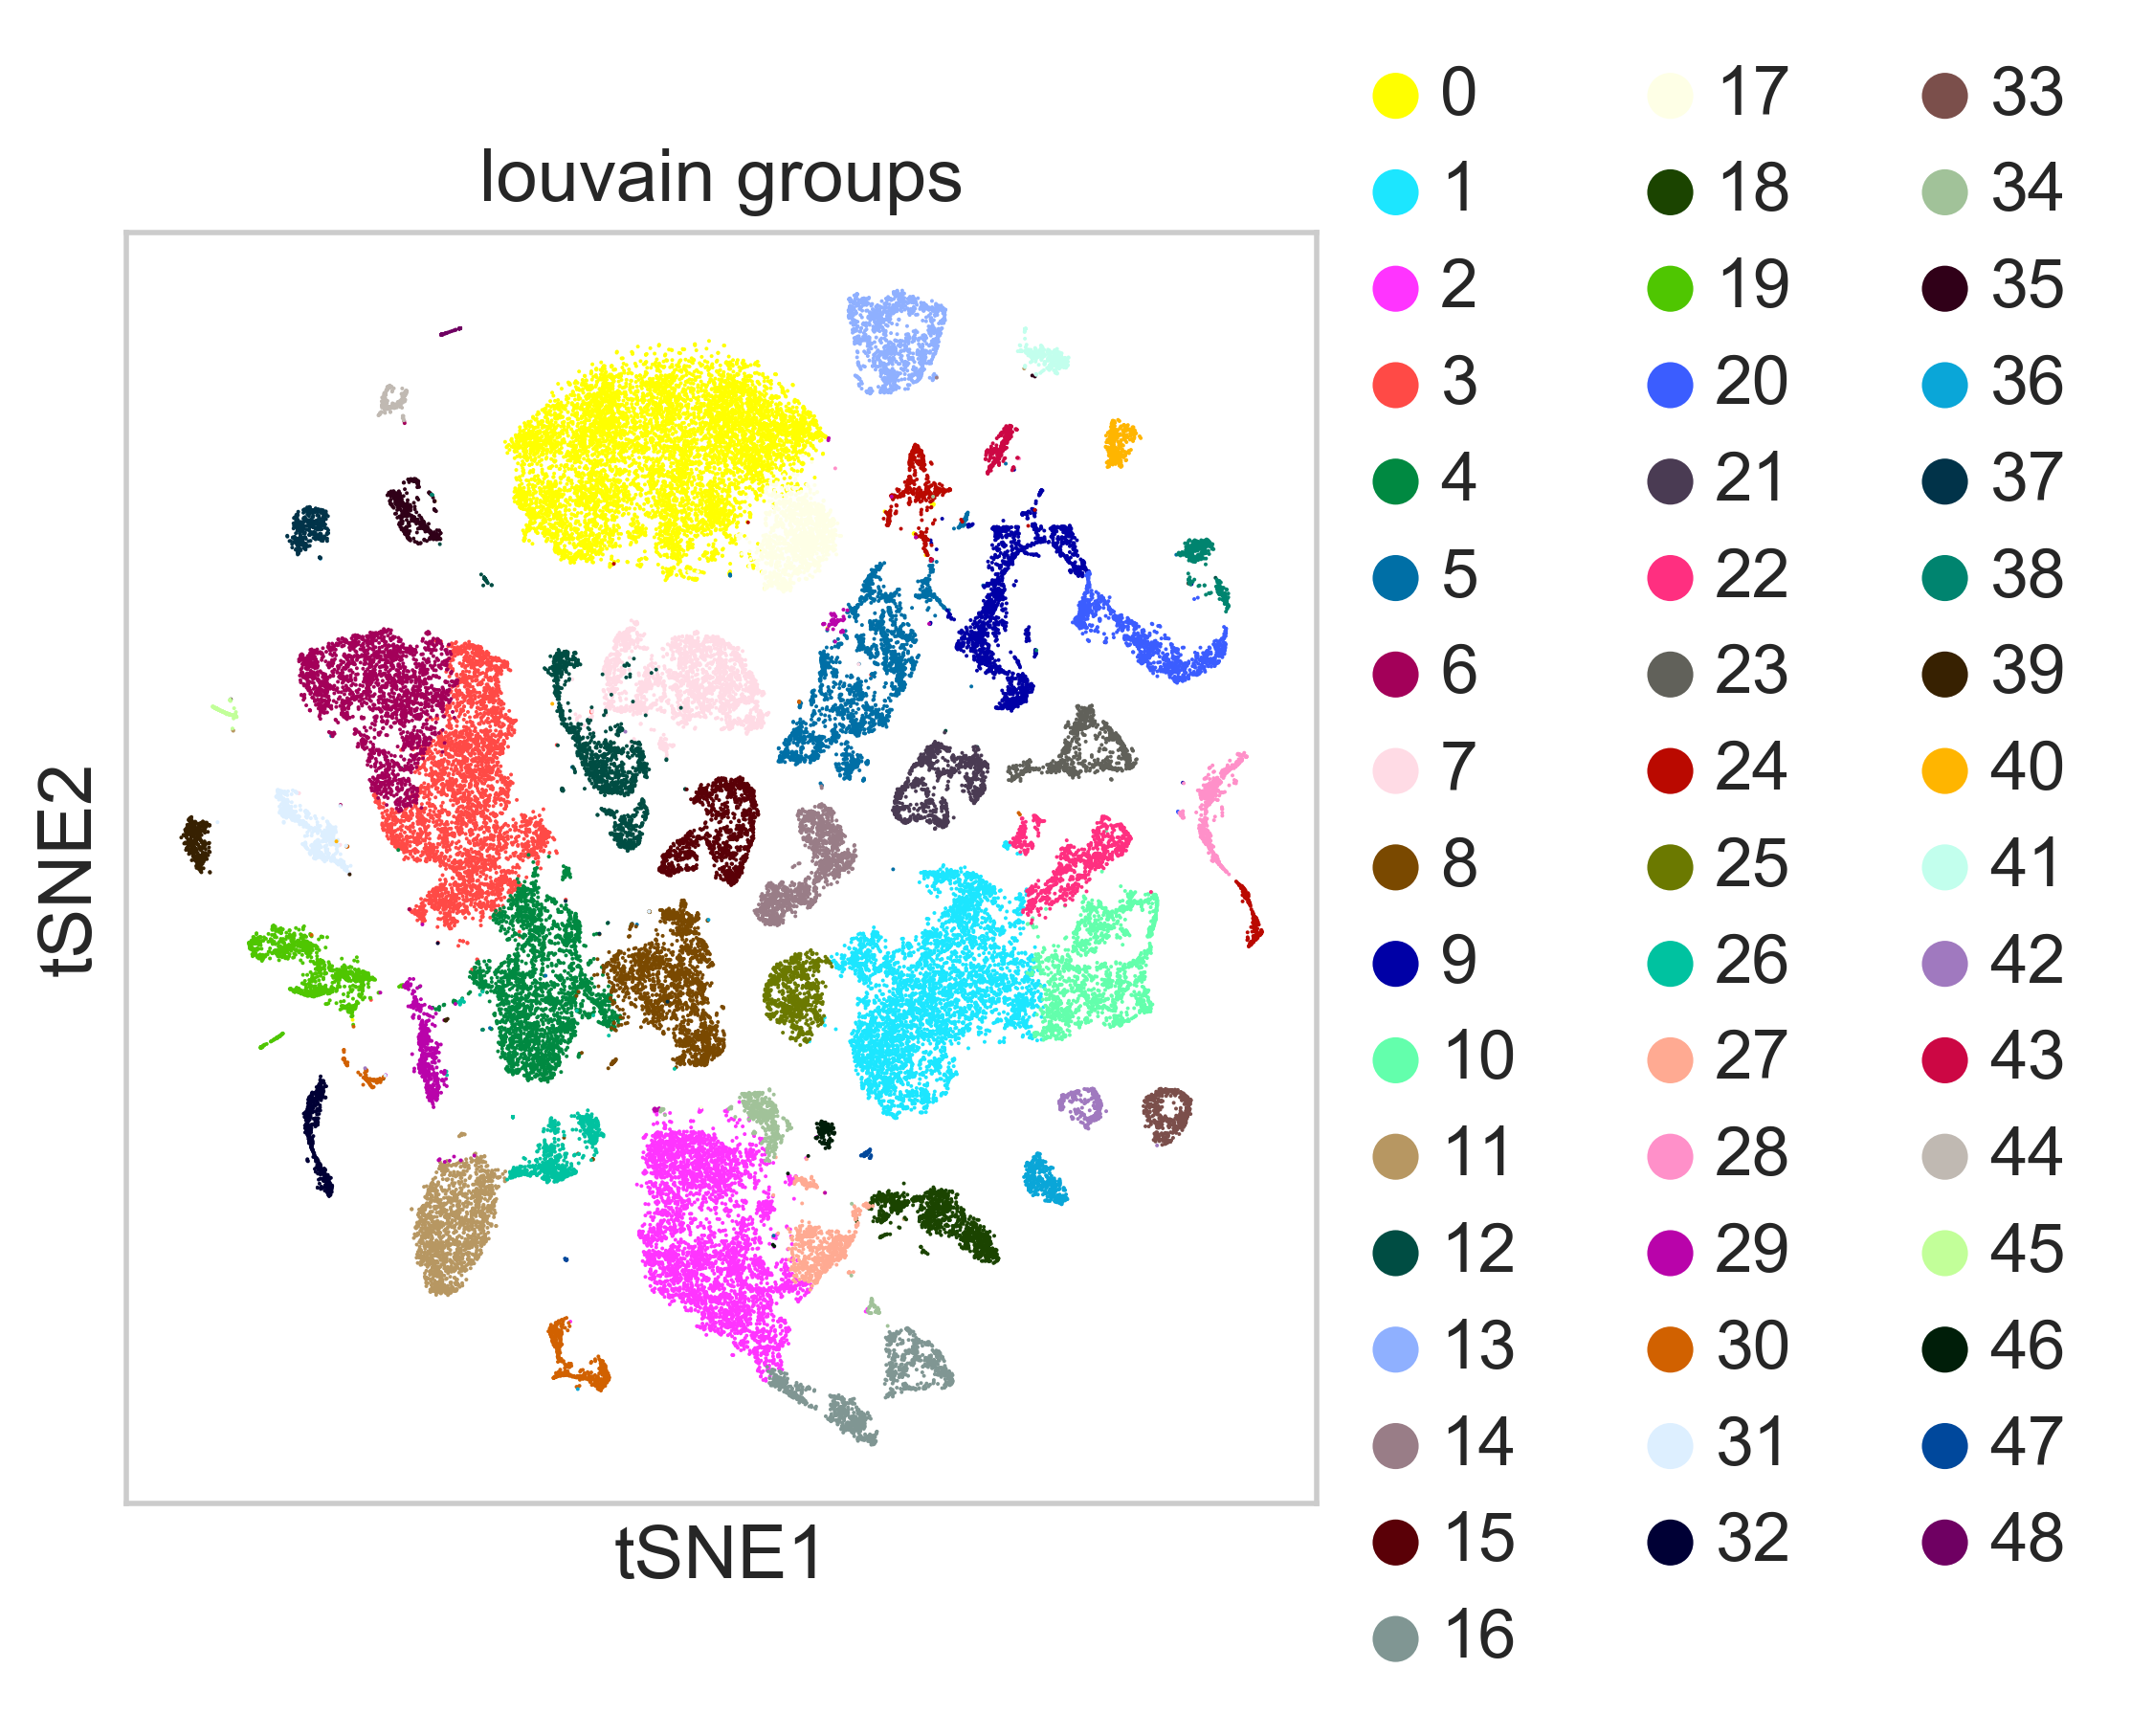

In [50]:
sc.pl.tsne(adata, color=['louvain_groups'], right_margin=0.5)

## Force-directed graph
Note that this ran for 10:41 on a 2016 13" Macbook Pro

In [26]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fr"
    using 'X_pca' with n_pcs = 50 for building graph
    using stored data graph with n_neighbors = 30 and spectrum
    [1.         0.9996776  0.9995776  0.9993246  0.9992813  0.99896175
     0.998886   0.99846095 0.99807554 0.9979416  0.99781233 0.9977179
     0.9971189  0.9965163  0.9965084 ]
    finished (10:41:16.527) --> added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obs)
    'draw_graph_params', the parameters (adata.uns)


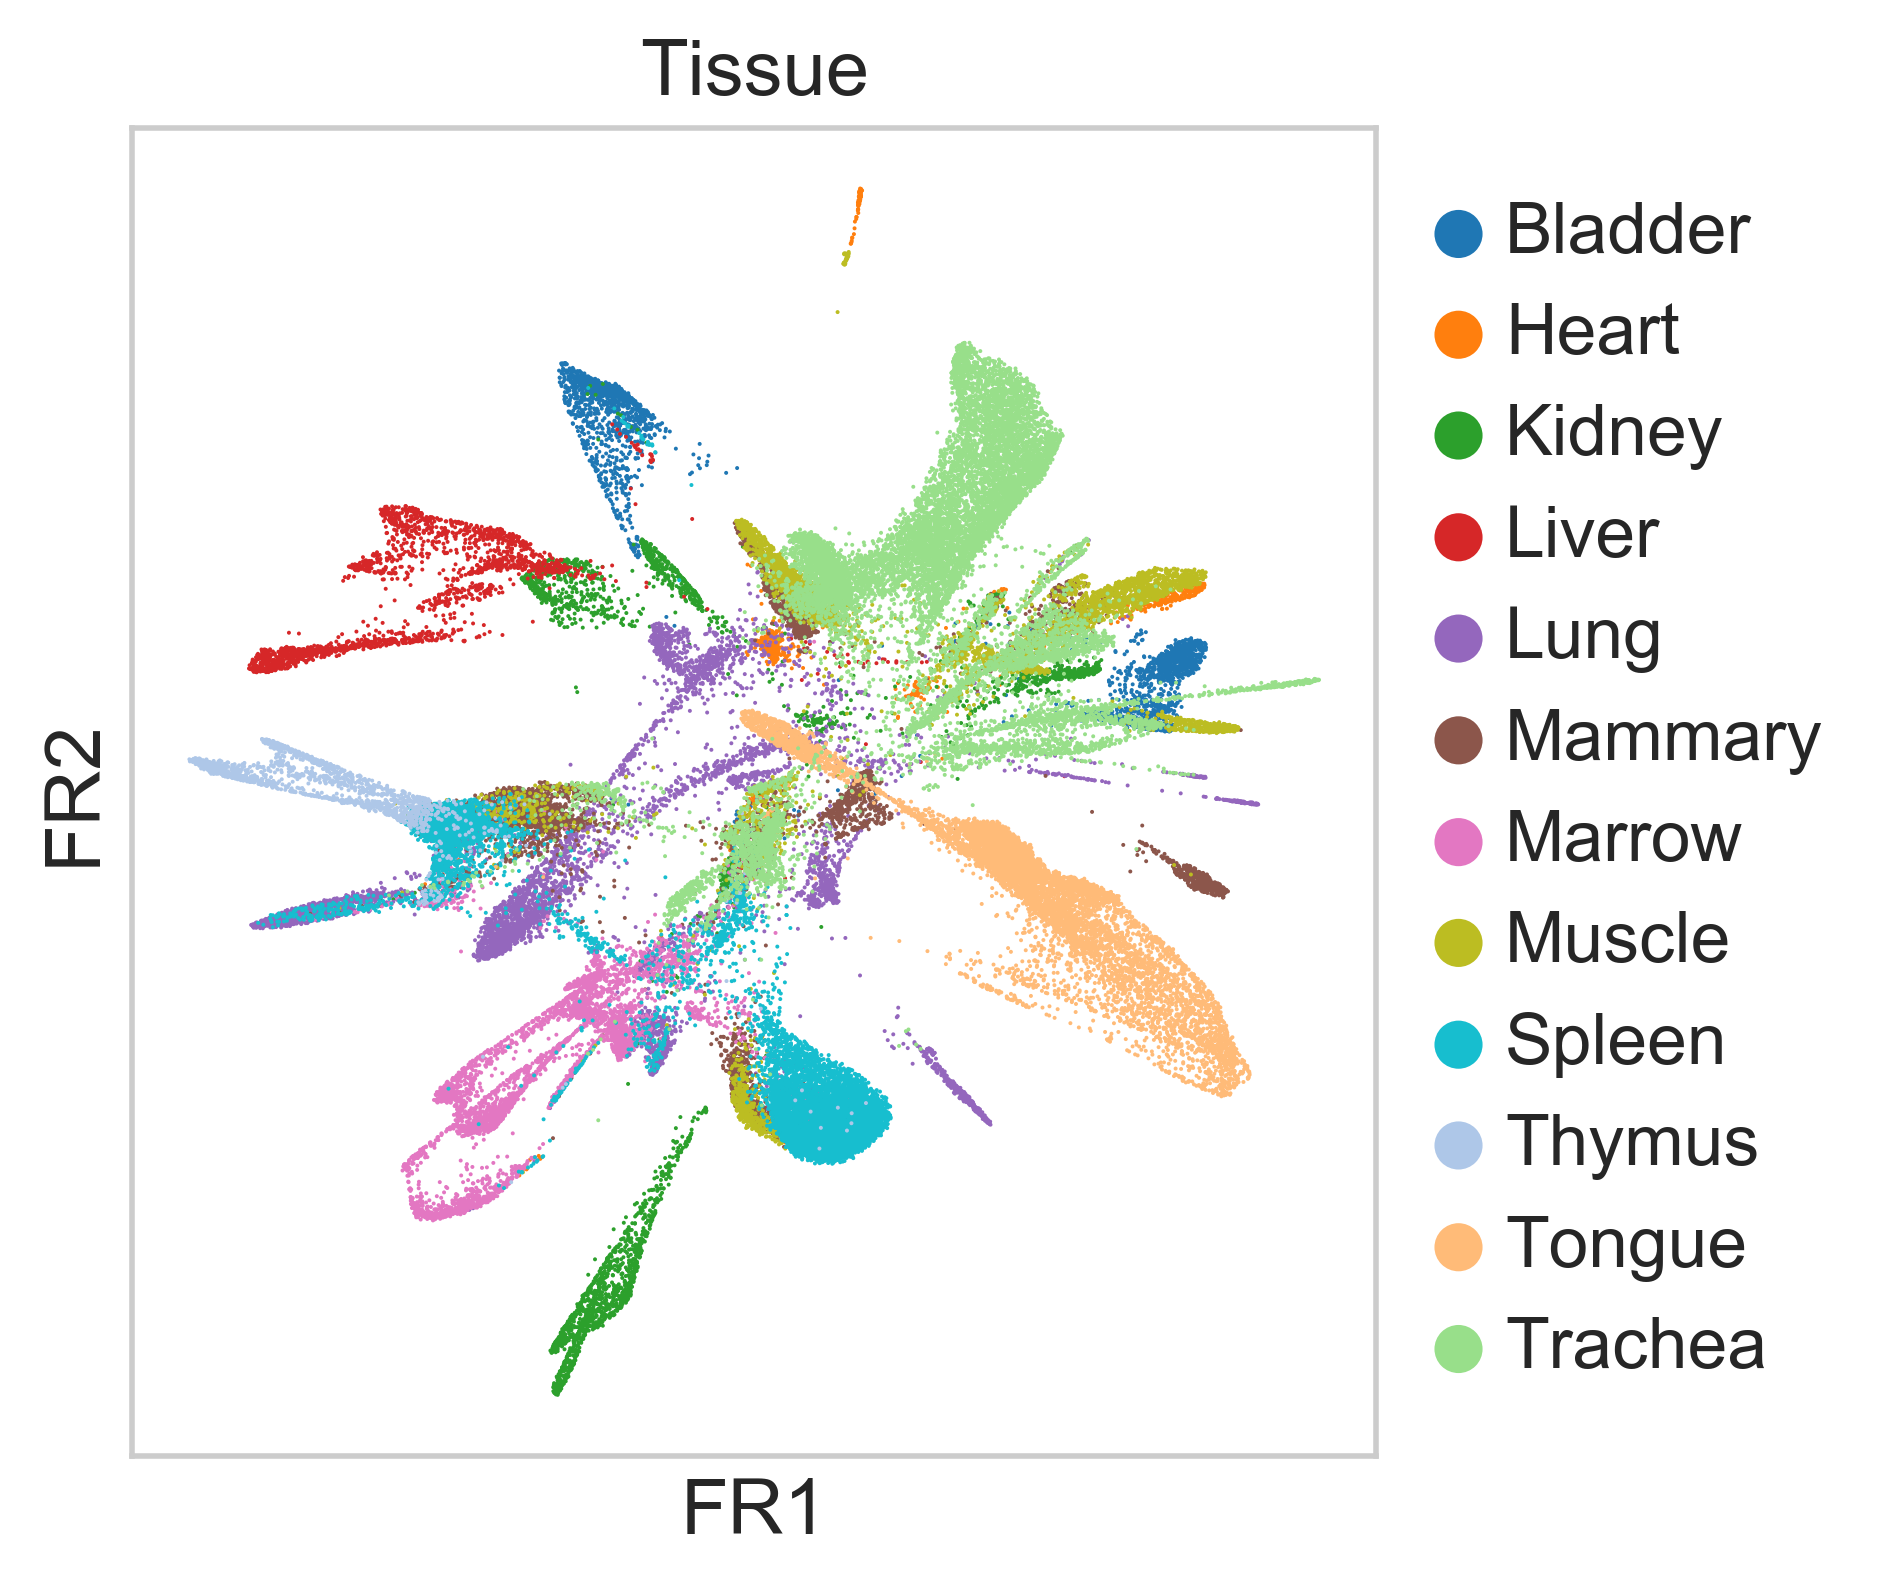

In [27]:
sc.pl.draw_graph(adata, color=['Tissue'])

... updating the color palette to provide enough colors


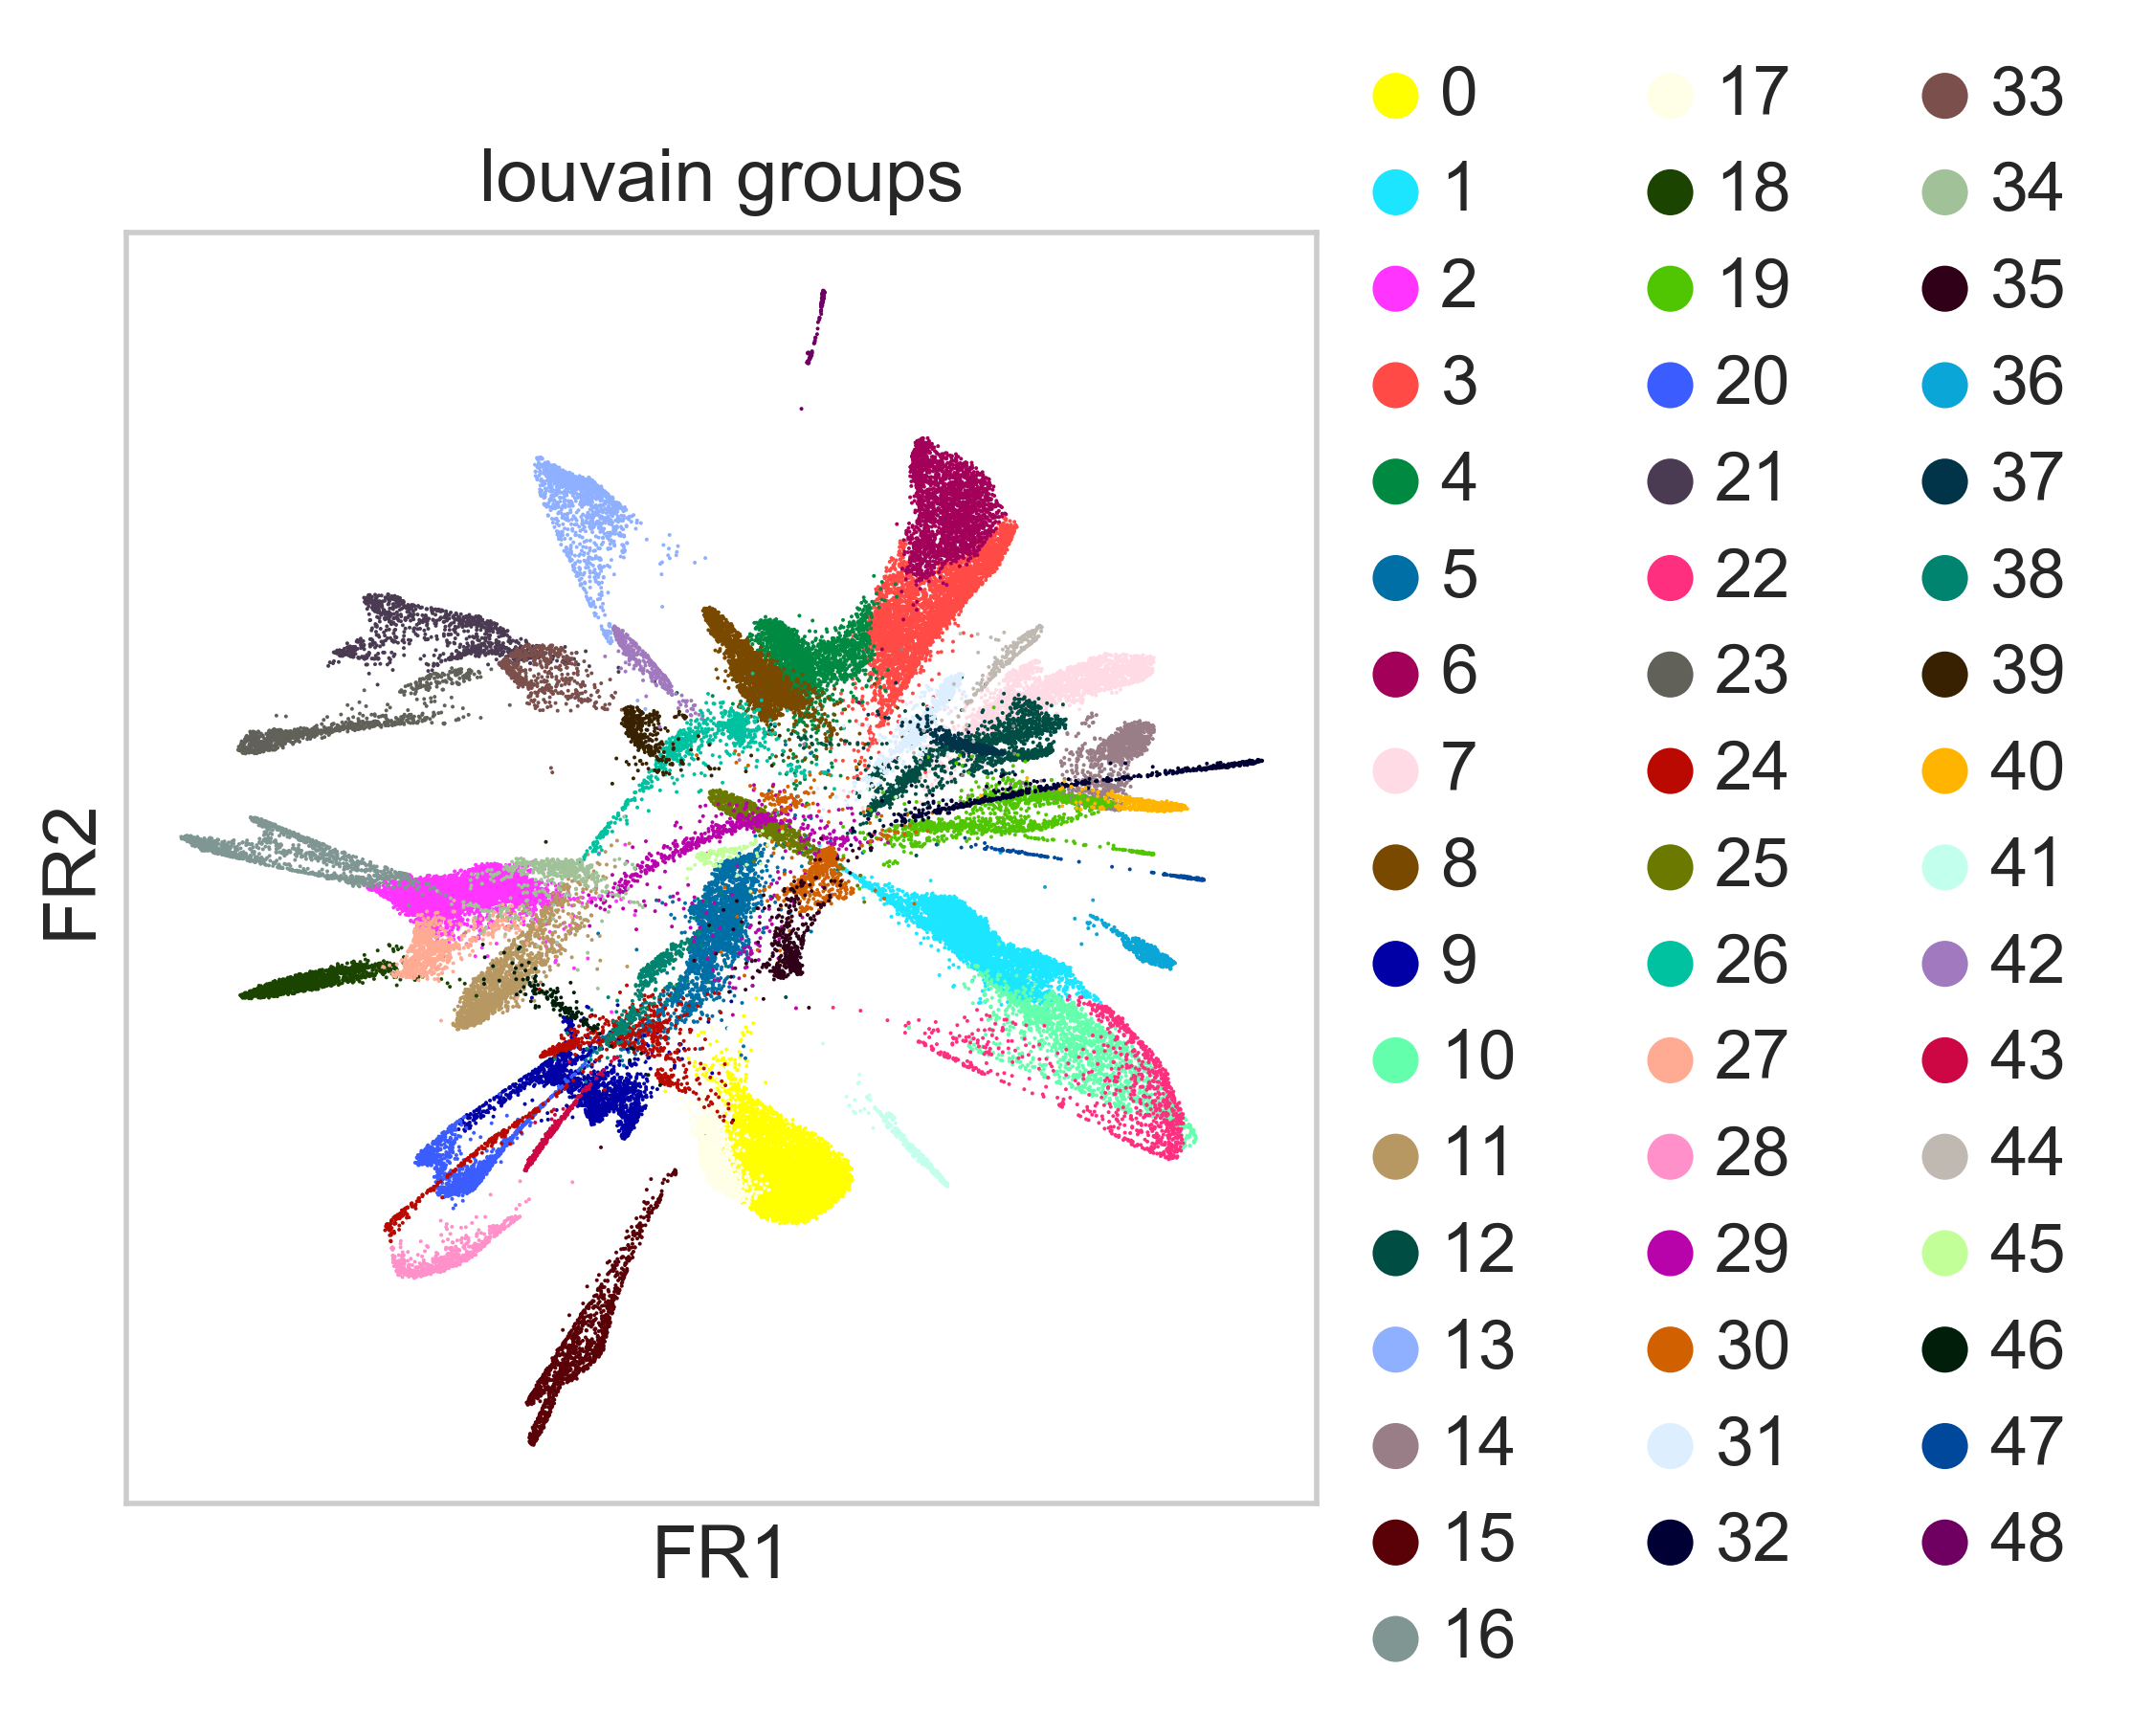

In [39]:
sc.pl.draw_graph(adata, color=['louvain_groups'])

# Save the processed data

In [42]:
adata.write('./write/mouse.atlas.processed.h5ad')